# Temat testów

1. Całkowity czas fiksacji/wizyt

HO: Brak istotnej statystycznie różnicy w całkowitym czasie fiksacji/wizyt między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w całkowitym czasie fiksacji/wizyt między grupami grafik A i B.

2. Średni czas fiksacji/wizyt

HO: Brak istotnej statystycznie różnicy w średnim czasie fiksacji/wizyt między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w średnim czasie fiksacji/wizyt między grupami grafik A i B.

3. Liczba fiksacji/wizyt

HO: Brak istotnej statystycznie różnicy w liczbie fiksacji/wizyt między grupami grafik A i B.

H1:  Istnieje istotna statystycznie różnica w liczbie fiksacji/wizyt między grupami grafik A i B.

Poziom istotności: $\alpha=0.05$

In [2]:
import pandas as pd
from functions.tests.dependent_groups.two_groups import ttest_or_wilcoxon
from functions.plots import plot_two_density, plot_two_boxplots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
names_sum = {1: 'Zsumowane_grafiki_A_z_poleceniem',
             2: 'Zsumowane_grafiki_A_bez_polecenia',
             3: 'Zsumowane_grafiki_A_tylko_polecenie',
             4: 'Zsumowane_grafiki_B_z_poleceniem',
             5: 'Zsumowane_grafiki_B_bez_polecenia',
             6: 'Zsumowane_grafiki_B_tylko_polecenie'}

names_coll = {1: 'Kolekcja_grafiki_A_z_poleceniem',
              2: 'Kolekcja_grafiki_A_bez_polecenia',
              3: 'Kolekcja_grafiki_A_tylko_polecenie',
              4: 'Kolekcja_grafiki_B_z_poleceniem',
              5: 'Kolekcja_grafiki_B_bez_polecenia',
              6: 'Kolekcja_grafiki_B_tylko_polecenie'}

names_samples = {
    1: '1a',
    2: '1b',
    3: '2a',
    4: '2b',
    5: '3a',
    6: '3b',
}

path = '/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/'

# fiksacje
df_sumA_withCom_f, df_sumA_withoutCom_f, df_sumA_onlyCom_f, df_sumB_withCom_f, df_sumB_withoutCom_f, df_sumB_onlyCom_f = [pd.read_csv(f'{path}fixation/dfs_sum_{name}.csv', index_col='ID') for _, name in names_sum.items()]

df_collA_withCom_f, df_collA_withoutCom_f, df_collA_onlyCom_f, df_collB_withCom_f, df_collB_withoutCom_f, df_collB_onlyCom_f = [pd.read_csv(f'{path}fixation/dfs_coll_{name}.csv') for _, name in names_coll.items()]

df_1a_f, df_1b_f, df_2a_f, df_2b_f, df_3a_f, df_3b_f  = [pd.read_csv(f'{path}fixation/dfs_samples_{name}.csv', index_col='ID').drop(columns=['Avg_pupil_map', 'Avg_pupil_com']) for _, name in names_samples.items()]

for df in [df_1b_f, df_2b_f, df_3b_f]:
    df.drop(columns=['Avg_pupil_plt', 'Avg_pupil_txt', 'Avg_pupil_tab'], inplace=True)

# wizyty
df_sumA_withCom_v, df_sumA_withoutCom_v, df_sumA_onlyCom_v, df_sumB_withCom_v, df_sumB_withoutCom_v, df_sumB_onlyCom_v = [pd.read_csv(f'{path}visit/dfs_sum_{name}.csv', index_col='ID') for _, name in names_sum.items()]

df_collA_withCom_v, df_collA_withoutCom_v, df_collA_onlyCom_v, df_collB_withCom_v, df_collB_withoutCom_v, df_collB_onlyCom_v = [pd.read_csv(f'{path}visit/dfs_coll_{name}.csv') for _, name in names_coll.items()]

df_1a_v, df_1b_v, df_2a_v, df_2b_v, df_3a_v, df_3b_v = [pd.read_csv(f'{path}visit/dfs_samples_{name}.csv', index_col='ID') for _, name in names_samples.items()]

In [4]:
def create_set_for_a_samples(df):
    total_with_com = df.filter(regex='Total').sum(axis=1)
    total_without_com = df.filter(regex='^Total_(?!com)').sum(axis=1)
    total_only_com  = df['Total_com']
    
    avg_with_com = df.filter(regex='Avg').sum(axis=1)
    avg_without_com = df.filter(regex='^Avg_(?!com)').sum(axis=1)
    avg_only_com  = df['Avg_com']

    num_with_com = df.filter(regex='Num').sum(axis=1)
    num_without_com = df.filter(regex='^Num_(?!com)').sum(axis=1)
    num_only_com  = df['Num_com']
    return pd.DataFrame(data={'Total_with_com': total_with_com, 'Total_without_com': total_without_com, 'Total_only_com': total_only_com, 'Avg_with_com': avg_with_com, 'Avg_without_com': avg_without_com, 'Avg_only_com': avg_only_com, 'Num_with_com': num_with_com, 'Num_without_com': num_without_com, 'Num_only_com': num_only_com})

In [5]:
df_1a_f = create_set_for_a_samples(df_1a_f)
df_2a_f = create_set_for_a_samples(df_2a_f)
df_3a_f = create_set_for_a_samples(df_3a_f)

df_1b_f = create_set_for_a_samples(df_1b_f)
df_2b_f = create_set_for_a_samples(df_2b_f)
df_3b_f = create_set_for_a_samples(df_3b_f)

df_1a_v = create_set_for_a_samples(df_1a_v)
df_2a_v = create_set_for_a_samples(df_2a_v)
df_3a_v = create_set_for_a_samples(df_3a_v)

df_1b_v = create_set_for_a_samples(df_1b_v)
df_2b_v = create_set_for_a_samples(df_2b_v)
df_3b_v = create_set_for_a_samples(df_3b_v)

In [6]:
ALPHA = 0.05

Całkowity czas fiksacji

In [7]:
# kolekcje A vs B
results = []
var = 'Total'
results.append(var)
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1851.0
p-value: 3.1779839760054013e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1939.0
p-value: 9.48873549433215e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2642.0
p-value: 0.019684078529655098
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [8]:
# sumy A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 109.0
p-value: 1.6715837773517706e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 123.0
p-value: 4.7302397433668375e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 230.0
p-value: 0.014677642795504653
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [9]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 325.0
p-value: 0.259140549798758
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 300.0
p-value: 0.1423485195809917
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 260.0
p-value: 0.06965127866209192
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 154.0
p-value: 0.0003571899414964719
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 152.0
p-value: 0.0003167852501064772
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality tes

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Średni czas fiksacji

In [10]:
# kolekcje A vs B
var = 'Avg'
results.append('\n')
results.append(var)
print('Z poleceniem:')
df = pd.DataFrame()
df['A'] = df_collA_withCom_f[var]
df['B'] = df_collB_withCom_f[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
df = pd.DataFrame()
df['A'] = df_collA_withoutCom_f[var]
df['B'] = df_collB_withoutCom_f[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
df = pd.DataFrame()
df['A'] = df_collA_onlyCom_f[var]
df['B'] = df_collB_onlyCom_f[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
p= ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
120
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 4.0
p-value: 2.1797354473920793e-21
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
120
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 5.108656794122169
p-value: 1.2497679619707794e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
110
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2724.5
p-value: 0.5029897813233454
Brak podstaw do odrzucenia H0.


In [11]:
# sumy A vs B
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 0.0
p-value: 1.8189894035458565e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 4.576269891255112
p-value: 4.7205928351513345e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 324.0
p-value: 0.25349167909553216
Brak podstaw do odrzucenia H0.


In [12]:
# A vs B
var = 'Avg'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_with_com']
    df['B'] = df2[f'{var}_with_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Bez polecenia:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_without_com']
    df['B'] = df2[f'{var}_without_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Tylko polecenie:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_only_com']
    df['B'] = df2[f'{var}_only_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
40
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3.0
p-value: 9.094947017729282e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
35
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -0.7087864105177738
p-value: 0.483288946090382
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 0.0
p-value: 1.8189894035458565e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Liczba fiksacji

In [13]:
# kolekcje A vs B
var = 'Num'
results.append('\n')
results.append(var)
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1618.5
p-value: 1.3795564094766196e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1717.5
p-value: 5.478886384574149e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2347.0
p-value: 0.008503087730205229
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [14]:
# sumy A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 76.0
p-value: 9.583873179508373e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 92.0
p-value: 4.153314876020886e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 220.5
p-value: 0.009781997654499719
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [15]:
# A vs B
var = 'Num'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 342.0
p-value: 0.36820016943056544
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 314.0
p-value: 0.20159339489509875
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 240.0
p-value: 0.05828240618662191
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 110.5
p-value: 1.805902866180986e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 99.5
p-value: 7.508137059630826e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality t

Podsumowanie - fiksacje:
Istotne statystycznie:
- całkowita długość fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 2 (z poleceniem i bez polecenia), 3 (wszystkie warianty)
- średnia długość fiksacji: kolekcje (z poleceniem, bez polecenia), sumy (z poleceniem, bez polecenia), 1 (z poleceniem, bez polecenia), 2 (z poleceniem, bez polecenia), 3 (z poleceniem, bez polecenia) 
- liczba fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 2 (z poleceniem, bez polecenia), 3 (wszystkie warianty)

Całkowity czas wizyt

In [16]:
# kolekcje A vs B
var = 'Total'
results.append('\n')
results.append(var)
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1901.0
p-value: 5.9537631196498075e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1738.0
p-value: 7.236737257842848e-07
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2729.5
p-value: 0.035963764552908804
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [17]:
# sumy A vs B
var = 'Total'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 127.0
p-value: 6.268265497055836e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 101.0
p-value: 8.847995559335686e-06
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 251.0
p-value: 0.03207873742940137
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [18]:
# A vs B
var = 'Total'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 330.0
p-value: 0.28865784978552256
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 311.0
p-value: 0.18761708125202858
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 253.0
p-value: 0.055897397574194284
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 155.0
p-value: 0.0003790976079471875
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 142.0
p-value: 0.00017029843002092093
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normalit

Średni czas wizyty

In [19]:
# kolekcje A vs B
var = 'Avg'
results.append('\n')
results.append(var)

print('Z poleceniem:')
df = pd.DataFrame()
df['A'] = df_collA_withCom_v[var]
df['B'] = df_collB_withCom_v[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
df = pd.DataFrame()
df['A'] = df_collA_withoutCom_v[var]
df['B'] = df_collB_withoutCom_v[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
df = pd.DataFrame()
df['A'] = df_collA_onlyCom_v[var]
df['B'] = df_collB_onlyCom_v[var]
df.dropna(inplace=True)
print(len(df))
groups = [df['A'], df['B']]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
120
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3576.0
p-value: 0.8875389994876579
Brak podstaw do odrzucenia H0.
Bez polecenia:
120
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 3393.0
p-value: 0.5348152961856554
Brak podstaw do odrzucenia H0.
Tylko polecenie:
110
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 2969.0
p-value: 0.8033432604162197
Brak podstaw do odrzucenia H0.


In [20]:
# sumy A vs B
var = 'Avg'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.18549192680645915
p-value: 0.8538045773666763
Brak podstaw do odrzucenia H0.
Bez polecenia:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: 0.8090215427684571
p-value: 0.4234110136533972
Brak podstaw do odrzucenia H0.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 381.0
p-value: 0.7046876743079338
Brak podstaw do odrzucenia H0.


In [21]:
# A vs B
var = 'Avg'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_with_com']
    df['B'] = df2[f'{var}_with_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Bez polecenia:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_without_com']
    df['B'] = df2[f'{var}_without_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Tylko polecenie:')
    df = pd.DataFrame()
    df['A'] = df1[f'{var}_only_com']
    df['B'] = df2[f'{var}_only_com']
    df.dropna(inplace=True)
    print(len(df))
    groups = [df['A'], df['B']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 218.0
p-value: 0.00899504264089046
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 206.0
p-value: 0.005332173790520756
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
35
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 244.0
p-value: 0.2516415869467892
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 196.0
p-value: 0.0033575435081729665
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
40
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 181.0
p-value: 0.0015980837451934349
Istnieją podstawy do odr

Liczba wizyt

In [22]:
# kolekcje A vs B
var = 'Num'
results.append('\n')
results.append(var)
print('Z poleceniem:')
groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 59.5
p-value: 8.6110913340471e-21
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 945.0
p-value: 1.6508857414659692e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1561.5
p-value: 3.359680958792093e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [23]:
# sumy A vs B
var = 'Num'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Bez polecenia:')
groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

print('Tylko polecenie:')
groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
p = ttest_or_wilcoxon(groups, ALPHA)
results.append(p)

Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 46.0
p-value: 3.480272425804287e-08
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting homogeneity variance test...
Conducting t-test...
t-statistic: -4.11172119473331
p-value: 0.00019579937381779958
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


In [24]:
# A vs B
var = 'Num'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Bez polecenia:')
    groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

    print('Tylko polecenie:')
    groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    p = ttest_or_wilcoxon(groups, ALPHA)
    results.append(p)

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:
Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 16.0
p-value: 3.0740920919924974e-10
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 6.5
p-value: 8.608198842665891e-08
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Tylko polecenie:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 205.5
p-value: 0.07091273930280144
Brak podstaw do odrzucenia H0.
-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 4.0
p-value: 1.2732925824820995e-11
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
Bez polecenia:
Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 1.0
p-value: 3.637978807091713e-12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Podsumowanie - wizyty:
Istotne statystycznie:
- całkowita długość fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 2 (z poleceniem i bez polecenia), 3 (z poleceniem i bez polecenia)
- średnia długość fiksacji: 1 (z poleceniem, bez polecenia), 2 (z poleceniem, bez polecenia)
- liczba fiksacji: kolekcje (wszystkie warianty), sumy (wszystkie warianty), 1 (z poleceniem, bez polecenia), 2 (z poleceniem, bez polecenia), 3 (wszystkie warianty)

Wykresy - fiksacje

In [26]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# 
# plt.figure(figsize=(9, 4))
# df_long = pd.melt(df_answers, value_vars=['1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud'],
#                   var_name='Pair', value_name='Value')
# 
# # Wygenerowanie wykresu z 6 pudełkami
# colors = sns.color_palette(None, n_colors=2)  # Wybór kolorów z palety Set3
# hue_order = ['1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud']
# labels = ['1A *', '1B *', '2A', '2B', '3A *', '3B *']
# 
# # Wygenerowanie wykresu z 6 pudełkami
# sns.set(style="whitegrid")
# ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order)
# plt.xlabel('Zadanie')
# ax.set_xticklabels(labels)
# plt.ylabel('Ocena trudności zadania')
# plt.show()

TOTAL
Z poleceniem:


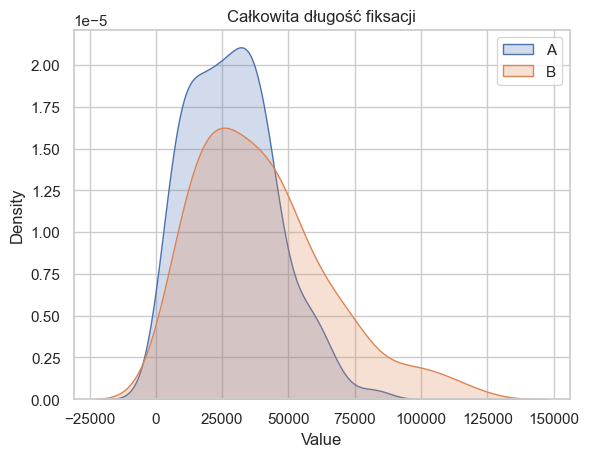

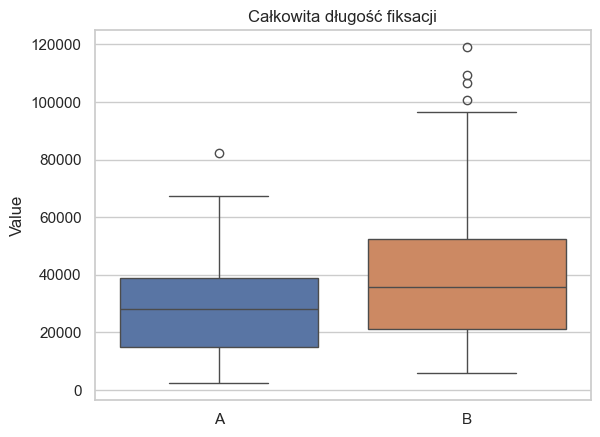

Bez polecenia:


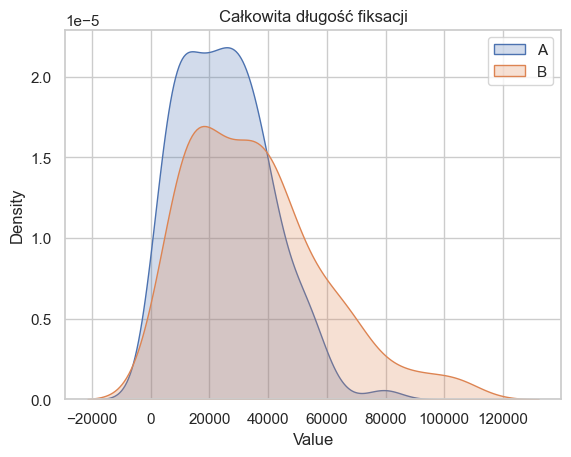

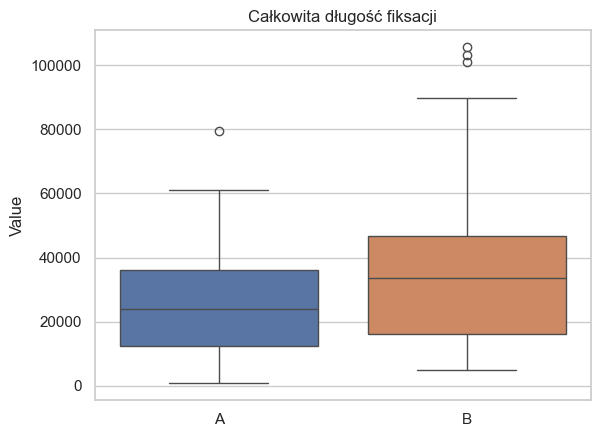

Tylko polecenie:


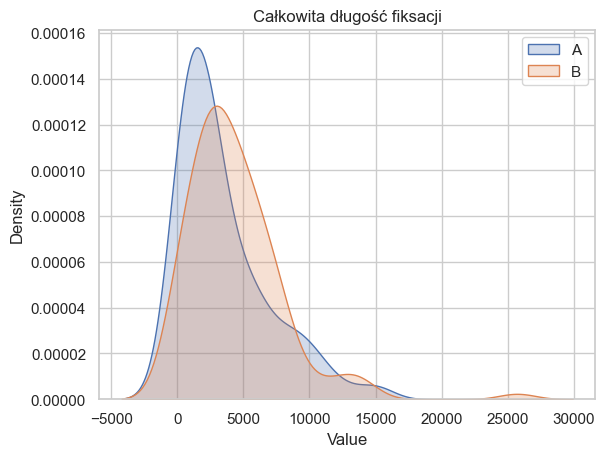

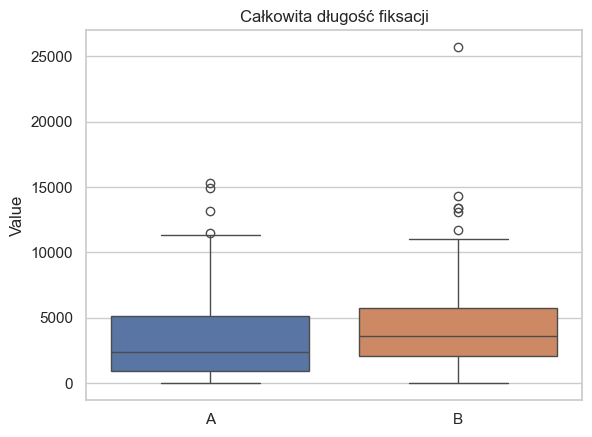

------------------------------------------
AVG
Z poleceniem:


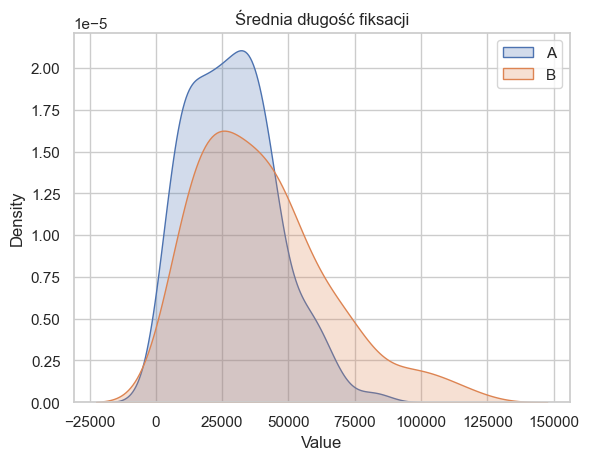

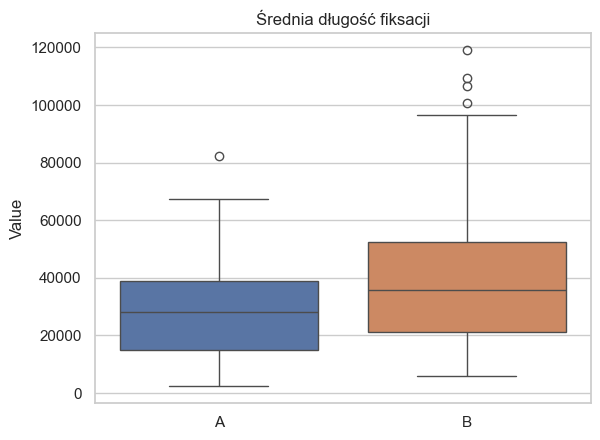

Bez polecenia:


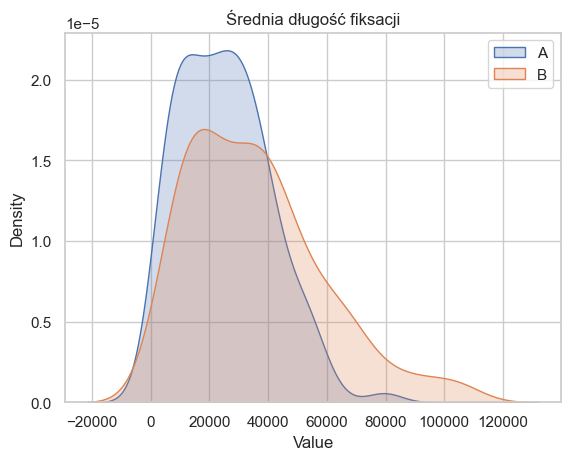

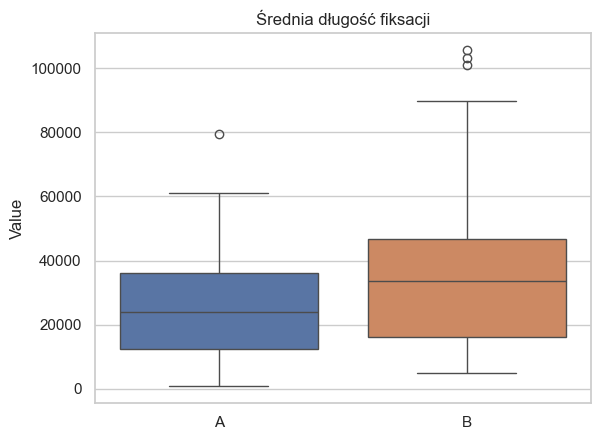

Tylko polecenie:


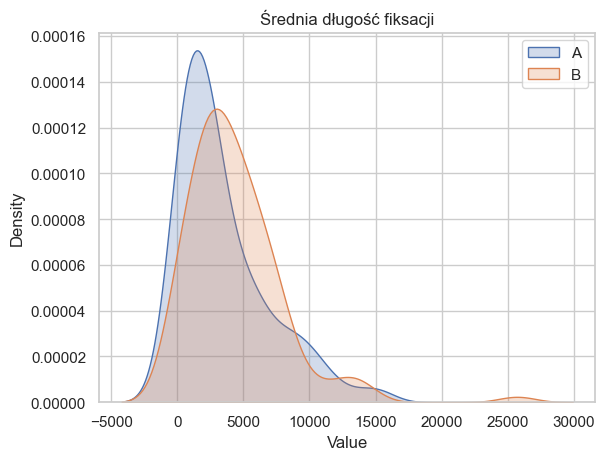

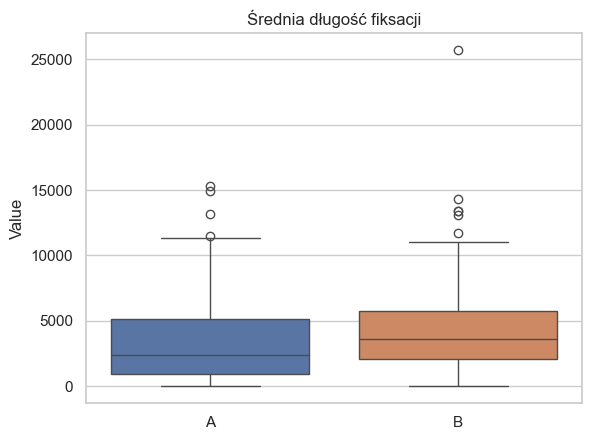

------------------------------------------
NUM
Z poleceniem:


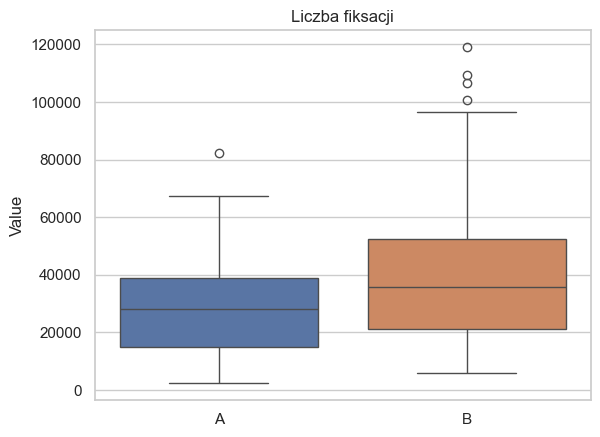

Bez polecenia:


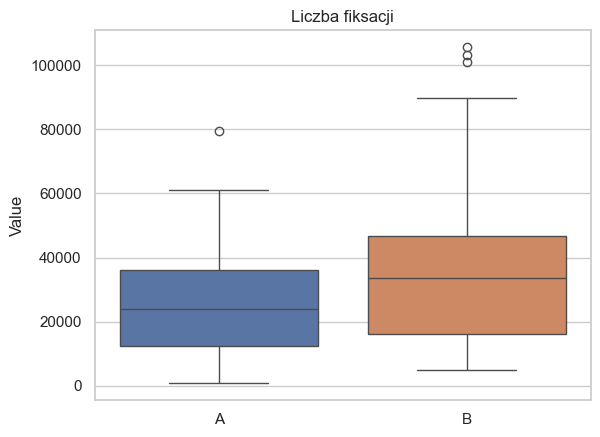

Tylko polecenie:


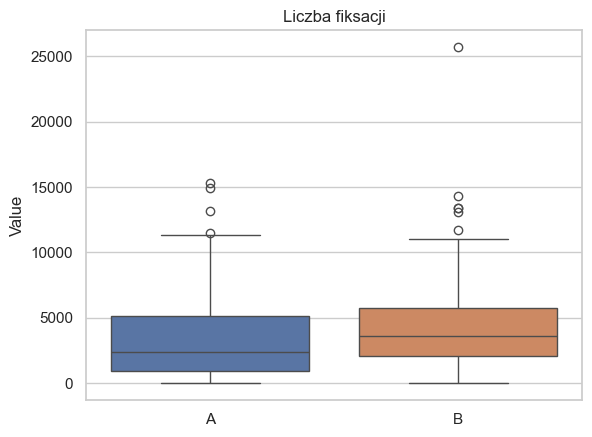

In [27]:
# kolekcje
var = 'Total'
title = 'Całkowita długość fiksacji'
print('TOTAL')
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
title = 'Średnia długość fiksacji'
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
title = 'Liczba fiksacji'
print('Z poleceniem:')
groups = [df_collA_withCom_f[var], df_collB_withCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Bez polecenia:')
groups = [df_collA_withoutCom_f[var], df_collB_withoutCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

print('Tylko polecenie:')
groups = [df_collA_onlyCom_f[var], df_collB_onlyCom_f[var]]
plot_two_boxplots(groups[0], groups[1], title=title)

In [28]:
def plot_multi_boxplot_t(df: pd.DataFrame, category_param: str, continue_param: str, label_category: str, label_continue: str, title: str = "Boxplot dla grup"):
    # sns.set(style="whitegrid")
    plt.figure(figsize=(3, 4))
    new = df[continue_param]/1000
    ax = sns.boxplot(data=df, x=category_param, y=new, orient="v", width=0.4, palette='pastel')
    # plt.title(title)
    plt.grid(True, axis='y')
    plt.xlabel('')
    plt.ylim(0,120)
    plt.ylabel(label_continue)

    ax.set_xticklabels(['A', 'B'])
    
    plt.annotate(
    '', xy=(0.25, -0.12), xycoords='axes fraction', xytext=(0.75, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
    plt.annotate('*', xy=(0.5, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

    plt.show()

TOTAL
Z poleceniem:


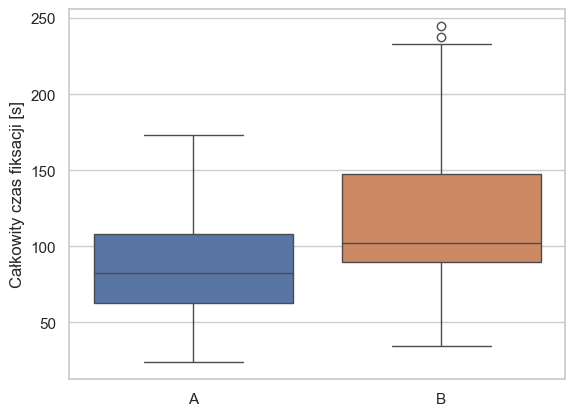

------------------------------------------
AVG
Z poleceniem:


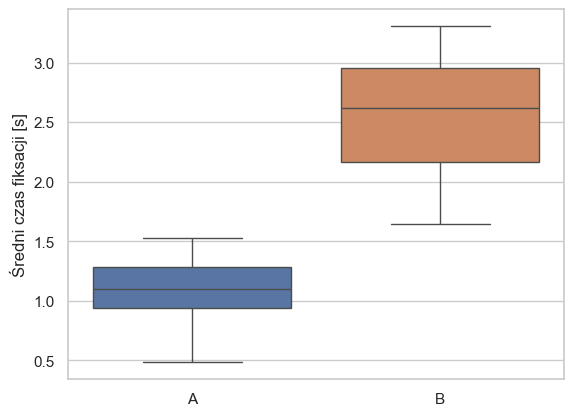

------------------------------------------
NUM
Z poleceniem:


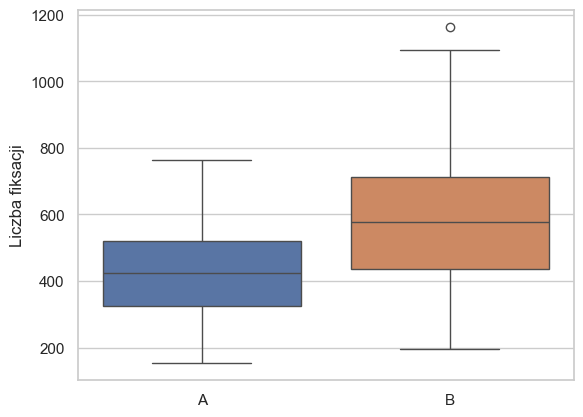

In [29]:
# sumy
var = 'Total'
# title = 'Całkowita długość fiksacji'
title = ''
print('TOTAL')
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
# plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

# print('Bez polecenia:')
# groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
var = 'Avg'
# title = 'Średnia długość fiksacji'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
# plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

# print('Bez polecenia:')
# groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
var = 'Num'
# title = 'Liczba fiksacji'
print('Z poleceniem:')
groups = [df_sumA_withCom_f[var], df_sumB_withCom_f[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

# print('Bez polecenia:')
# groups = [df_sumA_withoutCom_f[var], df_sumB_withoutCom_f[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_sumA_onlyCom_f[var], df_sumB_onlyCom_f[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)

In [ ]:

    
# plot_multi_boxplot_t(

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_5542/3902669437.py:36: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

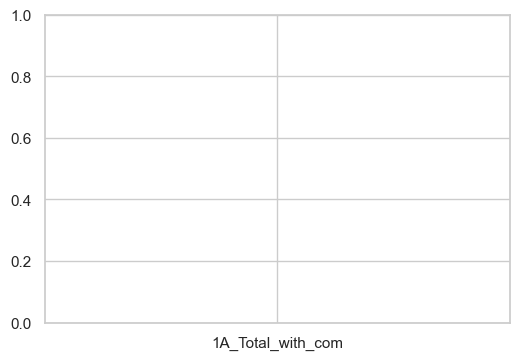

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add prefixes to the column names in each dataframe
df_1a_f_prefixed = df_1a_f.add_prefix('1A_')
df_1b_f_prefixed = df_1b_f.add_prefix('1B_')
df_2a_f_prefixed = df_2a_f.add_prefix('2A_')
df_2b_f_prefixed = df_2b_f.add_prefix('2B_')
df_3a_f_prefixed = df_3a_f.add_prefix('3A_')
df_3b_f_prefixed = df_3b_f.add_prefix('3B_')

# Combine data from different dataframes with prefixes
df_new = pd.concat([df_1a_f_prefixed['1A_Total_with_com'], df_1b_f_prefixed['1B_Total_with_com'], 
                    df_2a_f_prefixed['2A_Total_with_com'], df_2b_f_prefixed['2B_Total_with_com'], 
                    df_3a_f_prefixed['3A_Total_with_com'], df_3b_f_prefixed['3B_Total_with_com']], axis=1)

value_vars=['1A_Total_with_com', '1B_Total_with_com', '2A_Total_with_com', '2B_Total_with_com', '3A_Total_with_com', '3B_Total_with_com']
for val in value_vars:
    df_new[val] = df_new[val]

# Melt the dataframe
df_long = pd.melt(df_new, value_vars=['1A_Total_with_com', '1B_Total_with_com', '2A_Total_with_com', '2B_Total_with_com', '3A_Total_with_com', '3B_Total_with_com'],
                  var_name='Pair', value_name='Value')

# Generate boxplot
colors = sns.color_palette('pastel', n_colors=2)
hue_order = ['1A_Num_with_com', '1B_Num_with_com', '2A_Num_with_com', '2B_Num_with_com', '3A_Num_with_com', '3B_Num_with_com']
labels = ['1A', '1B', '2A', '2B', '3A', '3B']

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
plt.annotate(
    '', xy=(0.41, -0.12), xycoords='axes fraction', xytext=(0.58, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.49, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate(
    '', xy=(0.75, -0.12), xycoords='axes fraction', xytext=(0.92, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)
plt.xlabel('')
ax.set_xticklabels(labels)
plt.ylabel('Liczba fiksacji')
plt.show()



/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_5542/246565937.py:44: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_5542/246565937.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


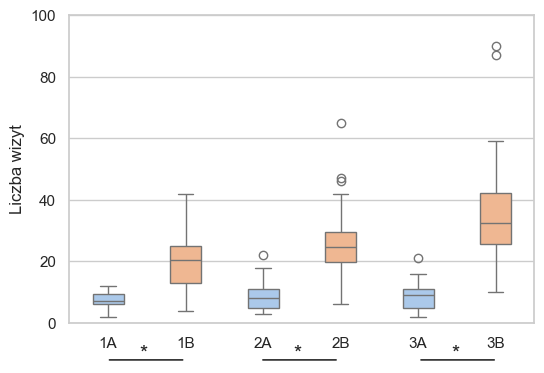

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
var = 'Num'

# Add prefixes to the column names in each dataframe
df_1a_f_prefixed = df_1a_v.add_prefix('1A_')
df_1b_f_prefixed = df_1b_v.add_prefix('1B_')
df_2a_f_prefixed = df_2a_v.add_prefix('2A_')
df_2b_f_prefixed = df_2b_v.add_prefix('2B_')
df_3a_f_prefixed = df_3a_v.add_prefix('3A_')
df_3b_f_prefixed = df_3b_v.add_prefix('3B_')

# df_1a_f_prefixed = df_1a_f.add_prefix('1A_')
# df_1b_f_prefixed = df_1b_f.add_prefix('1B_')
# df_2a_f_prefixed = df_2a_f.add_prefix('2A_')
# df_2b_f_prefixed = df_2b_f.add_prefix('2B_')
# df_3a_f_prefixed = df_3a_f.add_prefix('3A_')
# df_3b_f_prefixed = df_3b_f.add_prefix('3B_')

# Combine data from different dataframes with prefixes
df_new = pd.concat([df_1a_f_prefixed[f'1A_{var}_with_com'], df_1b_f_prefixed[f'1B_{var}_with_com'], 
                    df_2a_f_prefixed[f'2A_{var}_with_com'], df_2b_f_prefixed[f'2B_{var}_with_com'], 
                    df_3a_f_prefixed[f'3A_{var}_with_com'], df_3b_f_prefixed[f'3B_{var}_with_com']], axis=1)

value_vars=[f'1A_{var}_with_com', f'1B_{var}_with_com', f'2A_{var}_with_com', f'2B_{var}_with_com', f'3A_{var}_with_com', f'3B_{var}_with_com']
for val in value_vars:
    df_new[val] = df_new[val]
    
# Melt the dataframe
df_long = pd.melt(df_new, value_vars=[f'1A_{var}_with_com', f'1B_{var}_with_com', 
                                      f'2A_{var}_with_com', f'2B_{var}_with_com', 
                                      f'3A_{var}_with_com', f'3B_{var}_with_com'],
                  var_name='Pair', value_name='Value')

# Generate boxplot
colors = sns.color_palette('pastel', n_colors=2)
hue_order = [f'1A_{var}_with_com', f'1B_{var}_with_com', f'2A_{var}_with_com', f'2B_{var}_with_com', f'3A_{var}_with_com', f'3B_{var}_with_com']

labels = ['1A', '1B', '2A', '2B', '3A', '3B']

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', palette=colors, hue_order=hue_order, width=0.4)
plt.annotate(
    '', xy=(0.08, -0.12), xycoords='axes fraction', xytext=(0.25, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.16, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)


plt.annotate(
    '', xy=(0.41, -0.12), xycoords='axes fraction', xytext=(0.58, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.49, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate(
    '', xy=(0.75, -0.12), xycoords='axes fraction', xytext=(0.92, -0.12),
    textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, -0.13), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)
plt.xlabel('')
plt.ylim(0,100)
ax.set_xticklabels(labels)
plt.ylabel('Liczba wizyt')
plt.show()

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


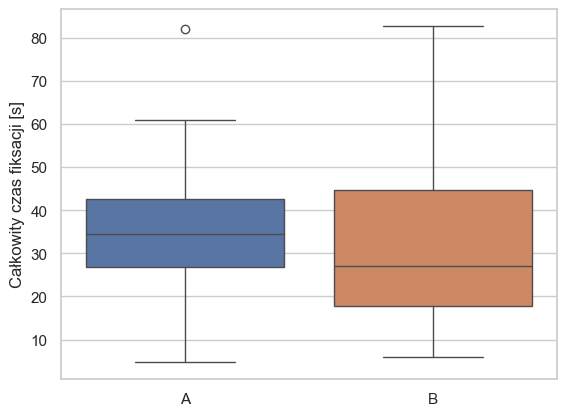

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


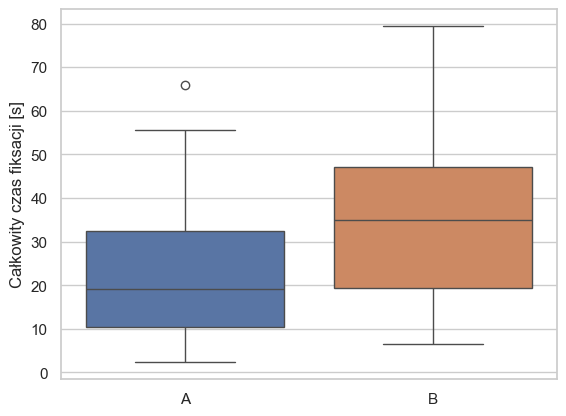

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


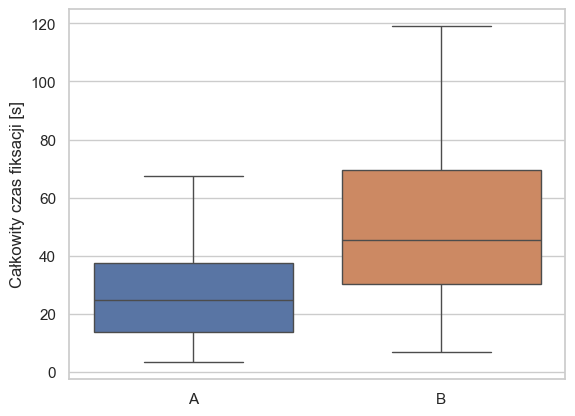

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


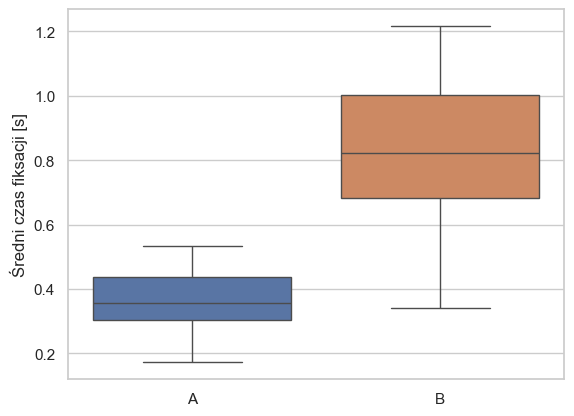

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


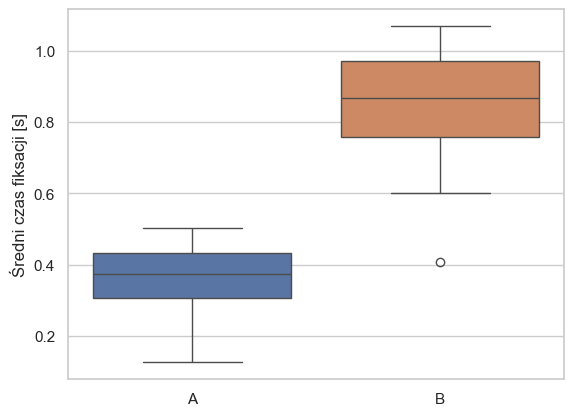

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


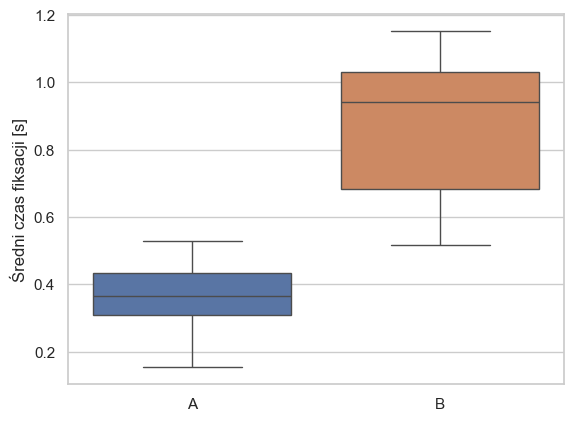

-----------------------------------
Grafiki 1a vs 1b:
Z poleceniem:


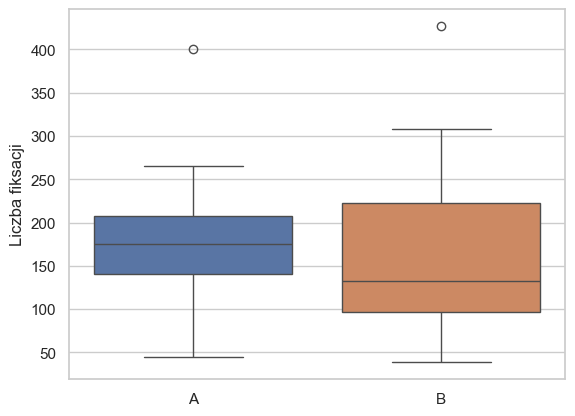

-----------------------------------
Grafiki 2a vs 2b:
Z poleceniem:


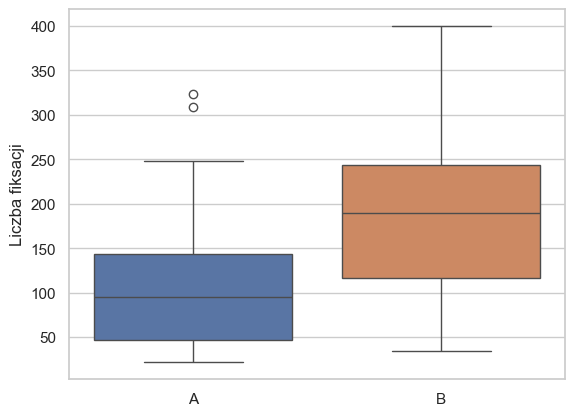

-----------------------------------
Grafiki 3a vs 3b:
Z poleceniem:


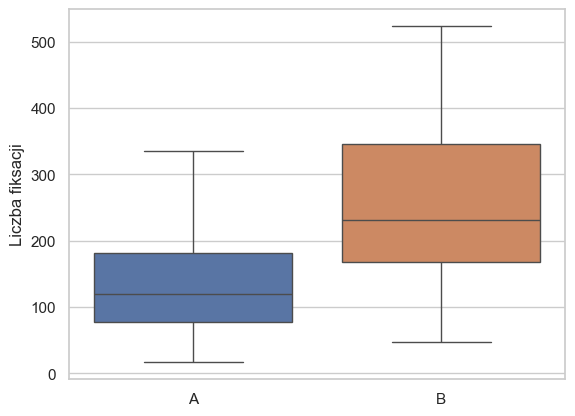

In [41]:
# A vs B
var = 'Total'
# title = 'Całkowita długość fiksacji'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas fiksacji [s]', title=title)

    # print('Bez polecenia:')
    # groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)
    # 
    # print('Tylko polecenie:')
    # groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Avg'
# title = 'Średnia długość fiksacji'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas fiksacji [s]', title=title)

    # print('Bez polecenia:')
    # groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)
    # 
    # print('Tylko polecenie:')
    # groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Num'
# title = 'Liczba fiksacji'
for i, dfs in enumerate([[df_1a_f, df_1b_f], [df_2a_f, df_2b_f], [df_3a_f, df_3b_f]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba fiksacji', title=title)

    # print('Bez polecenia:')
    # groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    # plot_two_boxplots(groups[0], groups[1], title=title)
    # 
    # print('Tylko polecenie:')
    # groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    # plot_two_boxplots(groups[0], groups[1], title=title)

Wykresy - wizyty

In [ ]:
# kolekcje
# var = 'Total'
# title = 'Całkowita długość wizyt'
# print('TOTAL')
# print('Z poleceniem:')
# groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Bez polecenia:')
# groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('------------------------------------------')
# print('AVG')
# title = 'Średnia długość wizyt'
# print('Z poleceniem:')
# groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Bez polecenia:')
# groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('------------------------------------------')
# print('NUM')
# title = 'Liczba wizyt'
# print('Z poleceniem:')
# groups = [df_collA_withCom_v[var], df_collB_withCom_v[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Bez polecenia:')
# groups = [df_collA_withoutCom_v[var], df_collB_withoutCom_v[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_collA_onlyCom_v[var], df_collB_onlyCom_v[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)

In [ ]:
# sumy
var = 'Total'
# title = 'Całkowita długość wizyt'
print('TOTAL')
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

# print('Bez polecenia:')
# groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('AVG')
var = 'Avg'
# title = 'Średnia długość wizyt'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

# print('Bez polecenia:')
# groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
# plot_two_density(groups[0], groups[1], title=title)
# plot_two_boxplots(groups[0], groups[1], title=title)

print('------------------------------------------')
print('NUM')
var = 'Num'
# title = 'Liczba wizyt'
print('Z poleceniem:')
groups = [df_sumA_withCom_v[var], df_sumB_withCom_v[var]]
plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)
# 
# print('Bez polecenia:')
# groups = [df_sumA_withoutCom_v[var], df_sumB_withoutCom_v[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)
# 
# print('Tylko polecenie:')
# groups = [df_sumA_onlyCom_v[var], df_sumB_onlyCom_v[var]]
# plot_two_boxplots(groups[0], groups[1], title=title)

In [ ]:
# A vs B
var = 'Total'
# title = 'Całkowita długość wizyt'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Całkowity czas wizyt [s]', title=title)

    # print('Bez polecenia:')
    # groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)
    # 
    # print('Tylko polecenie:')
    # groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Avg'
# title = 'Średnia długość wizyt'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    plot_two_boxplots(groups[0]/1000, groups[1]/1000, label='Średni czas wizyt [s]', title=title)

    # print('Bez polecenia:')
    # groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)
    # 
    # print('Tylko polecenie:')
    # groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    # plot_two_density(groups[0], groups[1], title=title)
    # plot_two_boxplots(groups[0], groups[1], title=title)

var = 'Num'
# title = 'Liczba wizyt'
for i, dfs in enumerate([[df_1a_v, df_1b_v], [df_2a_v, df_2b_v], [df_3a_v, df_3b_v]]):
    print('-----------------------------------')
    print(f'Grafiki {i+1}a vs {i+1}b:')
    df1, df2 = dfs
    print('Z poleceniem:')
    groups = [df1[f'{var}_with_com'], df2[f'{var}_with_com']]
    plot_two_boxplots(groups[0], groups[1], label='Liczba wizyt', title=title)

    # print('Bez polecenia:')
    # groups = [df1[f'{var}_without_com'], df2[f'{var}_without_com']]
    # plot_two_boxplots(groups[0], groups[1], title=title)
    # 
    # print('Tylko polecenie:')
    # groups = [df1[f'{var}_only_com'], df2[f'{var}_only_com']]
    # plot_two_boxplots(groups[0], groups[1], title=title)

In [ ]:
import csv
with open('./results/fiksacje_wizyty.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    row = []
    for item in results:
        if item != '\n':
            row.append(item)
        else:
            writer.writerow(row)
            row = []
    if row:  # Sprawdzamy, czy jest coś do zapisania w ostatnim wierszu
        writer.writerow(row)